In [1]:
import torch
from torch.utils.data import DataLoader
from torchtext import datasets
from torch.utils.data.backward_compatibility import worker_init_fn

In [2]:
!pip install portalocker>=2.0.0

In [3]:
!pip show torch
!pip show torchtext
!pip show torchdata
!pip show portalocker

Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision
Name: torchtext
Version: 0.17.1
Summary: Text utilities, models, transforms, and datasets for PyTorch.
Home-page: https://github.com/pytorch/text
Author: PyTorch Text Team
Author-email: packages@pytorch.org
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, requests, torch, torchdata, tqdm
Required-by: 
Name: torchdata
Ve

In [4]:
# Create data pipeline
train_data = datasets.UDPOS(split='train')

In [5]:
train_data

ShardingFilterIterDataPipe

In [6]:
def pad_collate(batch):
  xx = [b[0] for b in batch]
  yy = [b[1] for b in batch]
  x_lens = [len(x) for x in xx]
  return xx, yy, x_lens

In [7]:
train_loader = DataLoader(dataset=train_data, batch_size=5,
                          shuffle = True, num_workers=1,
                          worker_init_fn=worker_init_fn,
                          drop_last=True, collate_fn=pad_collate)


In [16]:
xx,yy,x_lens=next(iter(train_loader))


/usr/local/lib/python3.10/dist-packages/torch/utils/data/backward_compatibility.py:4: UserWarning: Usage of backward_compatibility.worker_init_fn is deprecated as DataLoader automatically applies sharding in every worker
  warnings.warn("Usage of backward_compatibility.worker_init_fn is deprecated"


In [11]:
def visualizeSentenceWithTags(text,udtags):

  print ( " Token " + " " . join ([ " " ]*(15) ) + " POS Tag " )
  print ( "--------------------------------------------------" )
  for w , t in zip ( text , udtags ) :
    print ( w + " " . join ([ " " ]*(20 - len ( w ) ) ) + t )

In [12]:
visualizeSentenceWithTags(xx[0],yy[0])

 Token                               POS Tag 
--------------------------------------------------
I                                     PRON
passed                           VERB
along                             ADV
to                                   ADP
Liz                                 PROPN
Austin                           PROPN
your                               PRON
request                         NOUN
regarding                     VERB
pleadings                     NOUN
A&K                                 PROPN
has                                 AUX
filed                             VERB
setting                         VERB
forth                             ADV
the                                 DET
Trustee                         NOUN
's                                   PART
position                       NOUN
in                                   ADP
connection                   NOUN
with                               ADP
the                                 DET
enforcemen

In [13]:
!rm -rf /root/.cache/torch/text/datasets/UDPOS
import torchtext
train_data = torchtext.datasets.UDPOS(split='train')
for item in train_data:
    print(item)
    break

[['Al', '-', 'Zaman', ':', 'American', 'forces', 'killed', 'Shaikh', 'Abdullah', 'al', '-', 'Ani', ',', 'the', 'preacher', 'at', 'the', 'mosque', 'in', 'the', 'town', 'of', 'Qaim', ',', 'near', 'the', 'Syrian', 'border', '.'], ['PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT'], ['NNP', 'HYPH', 'NNP', ':', 'JJ', 'NNS', 'VBD', 'NNP', 'NNP', 'NNP', 'HYPH', 'NNP', ',', 'DT', 'NN', 'IN', 'DT', 'NN', 'IN', 'DT', 'NN', 'IN', 'NNP', ',', 'IN', 'DT', 'JJ', 'NN', '.']]


In [14]:
import random

for i, (xx, yy, x_len) in enumerate(train_loader):
    if i >= 5:
        break
    print(f"Sample {i+1}:")
    visualizeSentenceWithTags(xx[0], yy[0])


/usr/local/lib/python3.10/dist-packages/torch/utils/data/backward_compatibility.py:4: UserWarning: Usage of backward_compatibility.worker_init_fn is deprecated as DataLoader automatically applies sharding in every worker
  warnings.warn("Usage of backward_compatibility.worker_init_fn is deprecated"


Sample 1:
 Token                               POS Tag 
--------------------------------------------------
4                                     X
Sample 2:
 Token                               POS Tag 
--------------------------------------------------
Small                             ADJ
polygamous                   ADJ
groups                           NOUN
have                               AUX
existed                         VERB
in                                   ADP
the                                 DET
southwestern               ADJ
US                                   PROPN
under                             ADP
the                                 DET
watchful                       ADJ
yet                                 CCONJ
fairly                           ADV
benign                           ADJ
eye                                 NOUN
of                                   ADP
authorities                 NOUN
ever                               ADV
since                  

/usr/local/lib/python3.10/dist-packages/torch/utils/data/backward_compatibility.py:4: UserWarning: Usage of backward_compatibility.worker_init_fn is deprecated as DataLoader automatically applies sharding in every worker
  warnings.warn("Usage of backward_compatibility.worker_init_fn is deprecated"


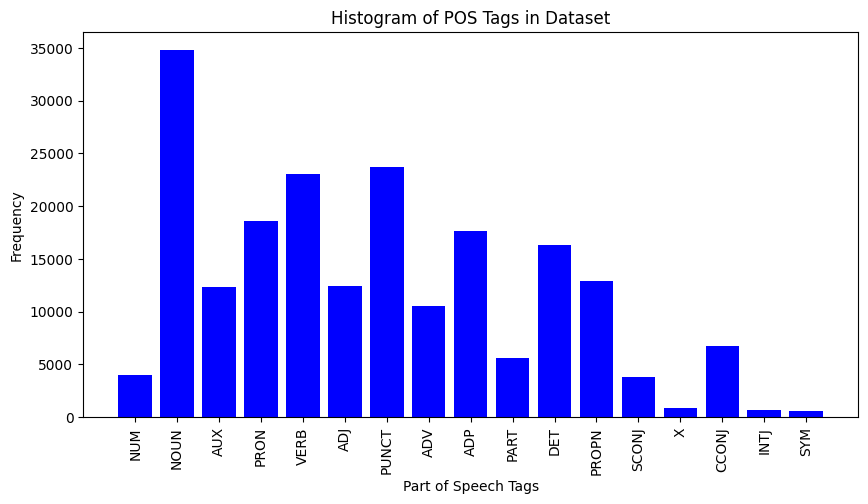

Most common tag: NOUN with a frequency of 34768
Majority baseline accuracy: 0.17


In [15]:
from collections import Counter
import matplotlib.pyplot as plt

# Initialize a counter to track the frequencies of POS tags
pos_tag_counter = Counter()

# Iterate over the training data loader to count POS tags
for _, tags_batch, _ in train_loader:
    for tags in tags_batch:
        pos_tag_counter.update(tags)

# Plotting the histogram of POS tag frequencies
plt.figure(figsize=(10, 5))
plt.bar(pos_tag_counter.keys(), pos_tag_counter.values(), color='blue')
plt.xlabel('Part of Speech Tags')
plt.ylabel('Frequency')
plt.title('Histogram of POS Tags in Dataset')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.show()

# Calculate the most common tag and the majority label accuracy
most_common_tag, most_common_tag_count = pos_tag_counter.most_common(1)[0]
total_tags = sum(pos_tag_counter.values())
majority_label_accuracy = most_common_tag_count / total_tags

# Output the most common tag and the accuracy
print(f'Most common tag: {most_common_tag} with a frequency of {most_common_tag_count}')
print(f'Majority baseline accuracy: {majority_label_accuracy:.2f}')
